# Comparing methods for a simple ODE

## Exercise 1

Use Euler's Method to solve for $x(t)$ given
$$ \frac{\text d x}{\text d t} = -x^3(t) + \sin(t) $$
from 0 to 10 seconds, with initial condition $x(t=0) = 0$.

Try with 20 time-steps, and again with 1000 time-steps. Plot the results, on the same graph.

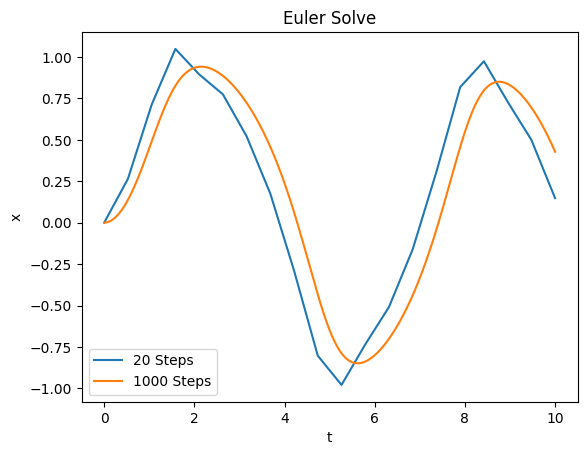

In [90]:
import numpy as np
import matplotlib.pyplot as plt

def diffEq(x, t=0):
    # differential equation
    return -x**3 + np.sin(t)

def eulerSolve(x0, t_array, f):
    
    h = t_array[1] - t_array[0]
    x_array = []
    x= x0
    for t in t_array:
        x += h*f(x, t)
        x_array.append(x)

    return np.array(x_array)


x0 = 0
t0 = 0
tend = 10  #s

t_array20 = np.linspace(t0, tend, 20)
t_array1000 = np.linspace(t0, tend, 1000)
x_array20Euler = eulerSolve(x0, t_array20, diffEq)
x_array1000Euler = eulerSolve(x0, t_array1000, diffEq)

plt.plot(t_array20, x_array20Euler, label='20 Steps')
plt.plot(t_array1000, x_array1000Euler, label='1000 Steps')
plt.xlabel("t")
plt.ylabel("x")
plt.title("Euler Solve")
plt.legend()

## Exercise 2

Repeat Exercise 1 using RK2.

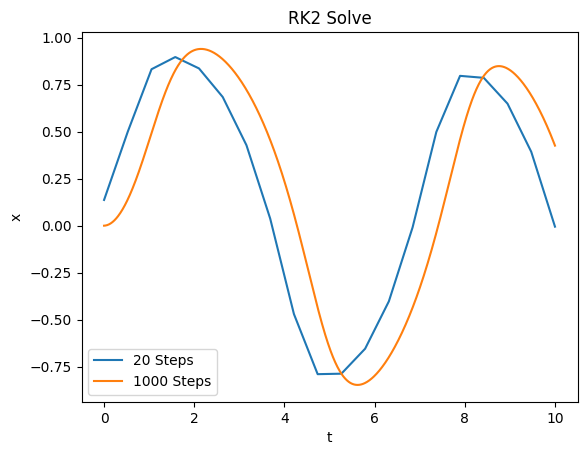

In [91]:


def RK2Solve(x0, t_array, f):
    # Solve using Runge Kutta Second Order

    h = t_array[1] - t_array[0]
    x_array = []
    x= x0

    for t in t_array:
        k1 = h*f(x, t)
        k2 = h*f(x + 0.5*k1, t+0.5*h)
        x += k2
        x_array.append(x)

    return np.array(x_array)

x_array20RK2 = RK2Solve(x0, t_array20, diffEq)
x_array1000RK2 = RK2Solve(x0, t_array1000, diffEq)

plt.plot(t_array20, x_array20RK2, label='20 Steps')
plt.plot(t_array1000, x_array1000RK2, label='1000 Steps')
plt.xlabel("t")
plt.ylabel("x")
plt.title("RK2 Solve")
plt.legend()

## Exercise 3

Repeat Exercise 1 using RK4.

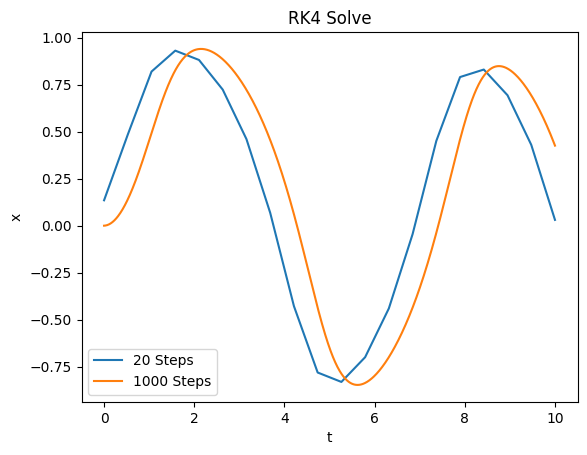

In [92]:


def RK4Solve(x0, t_array, f):
    # Solve using Runge Kutta Second Order

    h = t_array[1] - t_array[0]
    x_array = []
    x= x0

    for t in t_array:
        k1 = h*f(x, t)
        k2 = h*f(x+0.5*k1, t+0.5*h)
        k3 = h*f(x+0.5*k2, t+0.5*h)
        k4 = h*f(x+k3, t+h)
        x += (k1 + 2*k2 + 2*k3 + k4)/6
        x_array.append(x)

    return np.array(x_array)

x_array20RK4 = RK4Solve(x0, t_array20, diffEq)
x_array1000RK4 = RK4Solve(x0, t_array1000, diffEq)

plt.plot(t_array20, x_array20RK4, label='20 Steps')
plt.plot(t_array1000, x_array1000RK4, label='1000 Steps')
plt.xlabel("t")
plt.ylabel("x")
plt.title("RK4 Solve")
plt.legend()

## Exercise 4

Repeat Exercise 1 using Bulirsch-Stoer, with error tolerance 1e-08. You may copy-and-paste code from the textbook's 'bulirsch.py' to help you.

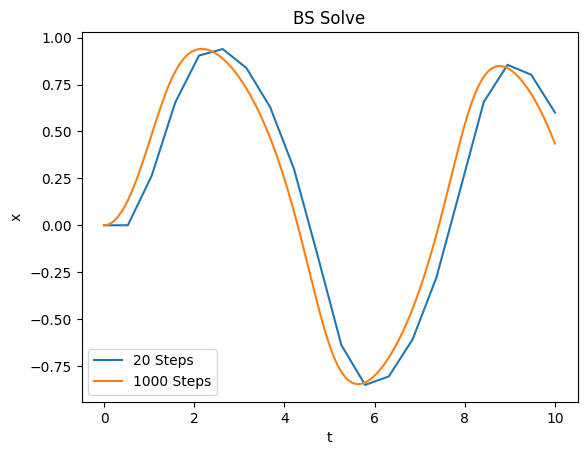

In [93]:
from numpy import empty
def BSSolve(x0, t_array, f):
    """Retrieved from the Textbook"""
    H = t_array[1] - t_array[0]
    x_array = []
    r= np.array([x0,0],float)  # just used their r function. we only care about first value
    # r = x0

    delta = 1e-8


    for t in t_array:

        x_array.append(r[0])

        # Do one modified midpoint step to get things started
        n = 1
        r1 = r + 0.5*H*f(r, t)
        r2 = r + H*f(r1, t)

        # The array R1 stores the first row of the
        # extrapolation table, which contains only the single
        # modified midpoint estimate of the solution at the
        # end of the interval
        R1 = empty([1,2],float)
        R1[0] = 0.5*(r1 + r2 + 0.5*H*f(r2, t))

        # Now increase n until the required accuracy is reached
        error = 2*H*delta
        while error>H*delta:

            n += 1
            h = H/n

            # Modified midpoint method
            r1 = r + 0.5*h*f(r, t)
            r2 = r + h*f(r1, t)
            for i in range(n-1):
                r1 += h*f(r2, t)
                r2 += h*f(r1, t)

            # Calculate extrapolation estimates.  Arrays R1 and R2
            # hold the two most recent lines of the table
            R2 = R1
            R1 = empty([n,2],float)
            R1[0] = 0.5*(r1 + r2 + 0.5*h*f(r2, t))
            for m in range(1,n):
                epsilon = (R1[m-1]-R2[m-1])/((n/(n-1))**(2*m)-1)
                R1[m] = R1[m-1] + epsilon
            error = abs(epsilon[0])

        # Set r equal to the most accurate estimate we have,
        # before moving on to the next big step
        r = R1[n-1]

    # print(x_array, len(x_array))
    return np.array(x_array)



x_array20BS = BSSolve(x0, t_array20, diffEq)
x_array1000BS = BSSolve(x0, t_array1000, diffEq)

plt.plot(t_array20, x_array20BS, label='20 Steps')
plt.plot(t_array1000, x_array1000BS, label='1000 Steps')
plt.xlabel("t")
plt.ylabel("x")
plt.title("BS Solve")
plt.legend()

## Exercise 5

Repeat Exercise 1 using scipy.integrate.odeint

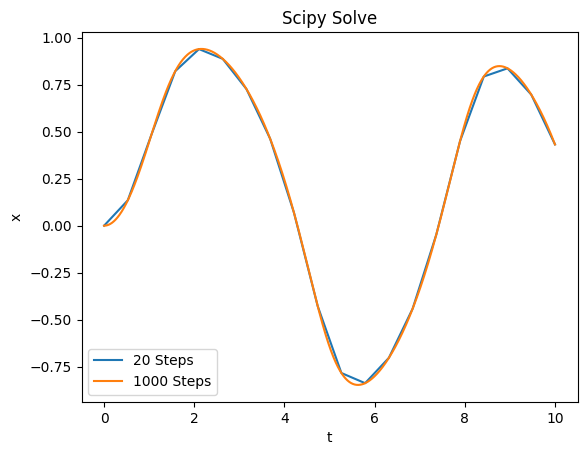

In [94]:
import scipy
import scipy.integrate
x_array20Scipy = scipy.integrate.odeint(diffEq, x0, t_array20)
x_array1000Scipy = scipy.integrate.odeint(diffEq, x0, t_array1000)

plt.plot(t_array20, x_array20Scipy, label='20 Steps')
plt.plot(t_array1000, x_array1000Scipy, label='1000 Steps')
plt.xlabel("t")
plt.ylabel("x")
plt.title("Scipy Solve")
plt.legend()

## Exercise 6

Plot your Exercise 1 through 5 results for $N=20$, on the same graph.

Plot your Exercise 1 through 5 results for $N=1000$, on the same graph. 

(So you should have 2 graphs for this exercise.)

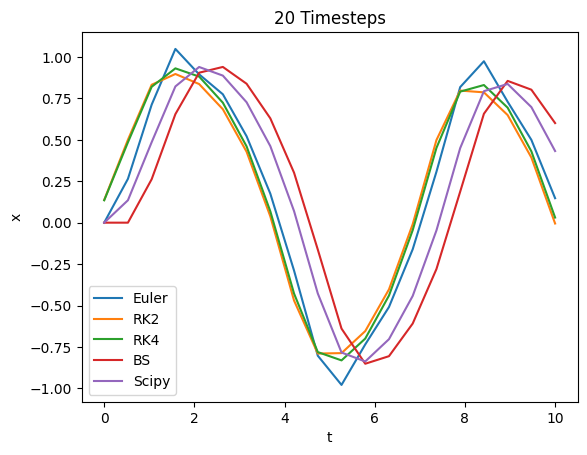

In [95]:
# For 20 timesteps

plt.plot(t_array20, x_array20Euler, label='Euler')
plt.plot(t_array20, x_array20RK2, label='RK2')
plt.plot(t_array20, x_array20RK4, label='RK4')
plt.plot(t_array20, x_array20BS, label='BS')
plt.plot(t_array20, x_array20Scipy, label='Scipy')
plt.xlabel("t")
plt.ylabel("x")
plt.title("20 Timesteps")
plt.legend()

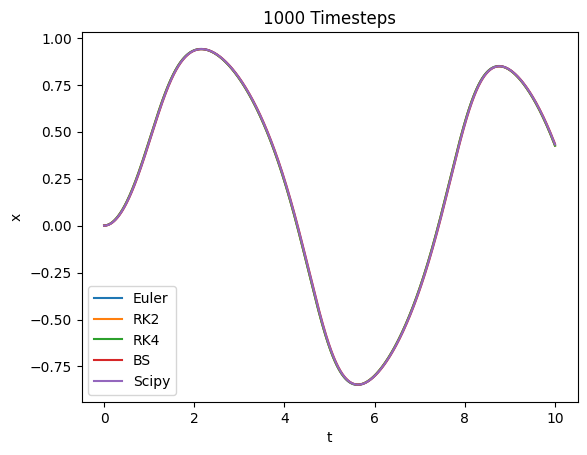

In [96]:
# For 1000 timesteps

plt.plot(t_array1000, x_array1000Euler, label='Euler')
plt.plot(t_array1000, x_array1000RK2, label='RK2')
plt.plot(t_array1000, x_array1000RK4, label='RK4')
plt.plot(t_array1000, x_array1000BS, label='BS')
plt.plot(t_array1000, x_array1000Scipy, label='Scipy')
plt.xlabel("t")
plt.ylabel("x")
plt.title("1000 Timesteps")
plt.legend()

# Stability of ODE Solutions

* We have focused on accuracy and speed in investigating our solutions to ODEs.
* But stability is also important!
* The stability of solutions tells us how fast initially close solutions diverge from each other.
* In other words, a stable solution tends to a finite number.
* Some systems are inherently unstable and so will always be challenging to simulate. Physical stability or instability of a system can be determined from small perturbations to a solution of the ODE.
* But even for physically stable systems, numerical methods can be unstable (i.e. give approximation and roundoff errors that grow).

## Exercise 7

Consider: $y'(t) = -2.3y(t), y(t=0) = 1$

The analytical solution is:
$y(t) = \exp (-2.3 t)$ . This is a stable solution, i.e. it tends to a finite number: $y \rightarrow 0$ as $t \rightarrow \infty$

Demonstrate (by making 2 plots) that computationally, the Euler method for the interval $0 < t < 20$ is stable for $h=0.7$ but unstable for $h=1$.

Text(0.5, 1.0, 'Stable Solution for h = 0.7')

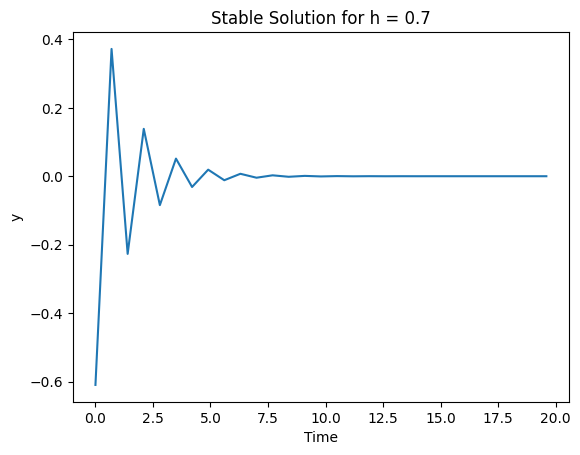

In [97]:
def diffEq(y, t):
    return -2.3 * y

y0 = 1
t0 = 0
tend = 20

t_array_stable = np.arange(t0, 20, 0.7)
t_array_unstable = np.arange(t0, 20, 1)

x_array_stable = eulerSolve(y0, t_array_stable, diffEq)
x_array_unstable = eulerSolve(y0, t_array_unstable, diffEq)

plt.plot(t_array_stable, x_array_stable)
plt.xlabel('Time')
plt.ylabel('y')
plt.title("Stable Solution for h = 0.7")

Text(0.5, 1.0, 'Unstable Solution for h = 1')

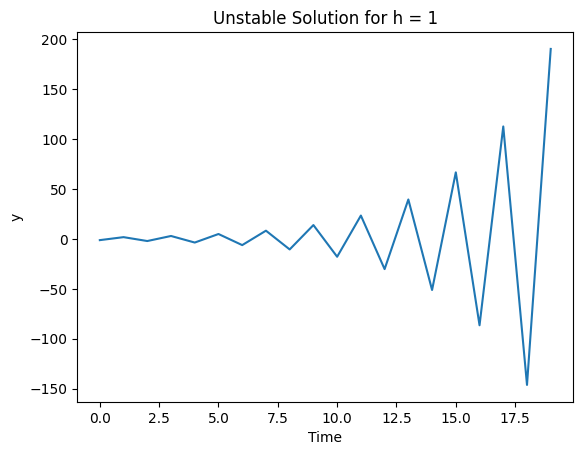

In [98]:
plt.plot(t_array_unstable, x_array_unstable)
plt.xlabel('Time')
plt.ylabel('y')
plt.title("Unstable Solution for h = 1")